In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [131]:
dataset= pd.read_csv('dataa.csv')

In [132]:
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [133]:

# Select numerical columns for outlier detection
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate quartiles and IQR
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR
outliers = ((dataset[numerical_columns] < (Q1 - 1.5 * IQR)) | (dataset[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print rows containing outliers
print("Rows containing outliers:")
print(dataset[outliers])


Rows containing outliers:
         Make     Model  Year             Engine Fuel Type  Engine HP  \
17       Audi       100  1992             regular unleaded      172.0   
18       Audi       100  1992             regular unleaded      172.0   
19       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
21       Audi       100  1992             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11794  Subaru        XT  1991             regular unleaded      145.0   
11810  Toyota  Yaris iA  2017             regular unleaded      106.0   
11903     BMW        Z8  2001  premium unleaded (required)      394.0   
11904     BMW        Z8  2002  premium unleaded (required)      394.0   
11905     BMW        Z8  2003  premium unleaded (required)      394.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
17              

In [134]:
dataset_clean = dataset[~outliers]
print("Shape of cleaned dataset:", dataset_clean.shape)


Shape of cleaned dataset: (9084, 16)


In [135]:
# fill missing values
for col in dataset_clean.select_dtypes(include=['object']).columns:
    most_frequent = dataset_clean[col].mode()[0]
    dataset_clean[col].fillna(most_frequent, inplace=True)
for col in dataset_clean.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = dataset_clean[col].mean()
    dataset_clean[col].fillna(mean_value, inplace=True)

<ipython-input-135-5a226985167a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[col].fillna(most_frequent, inplace=True)
<ipython-input-135-5a226985167a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[col].fillna(mean_value, inplace=True)


In [136]:
dataset_clean.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [137]:
# separate target value
X = dataset_clean.drop('MSRP', axis=1)
y = dataset_clean['MSRP'].to_numpy()

In [138]:
X.shape

(9084, 15)

In [139]:
y.shape

(9084,)

In [140]:
type(X)

pandas.core.frame.DataFrame

In [141]:
y

array([46135, 40650, 36350, ..., 50620, 50920, 28995])

In [142]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9084 non-null   object 
 1   Model              9084 non-null   object 
 2   Year               9084 non-null   int64  
 3   Engine Fuel Type   9084 non-null   object 
 4   Engine HP          9084 non-null   float64
 5   Engine Cylinders   9084 non-null   float64
 6   Transmission Type  9084 non-null   object 
 7   Driven_Wheels      9084 non-null   object 
 8   Number of Doors    9084 non-null   float64
 9   Market Category    9084 non-null   object 
 10  Vehicle Size       9084 non-null   object 
 11  Vehicle Style      9084 non-null   object 
 12  highway MPG        9084 non-null   int64  
 13  city mpg           9084 non-null   int64  
 14  Popularity         9084 non-null   int64  
 15  MSRP               9084 non-null   int64  
dtypes: float64(3), int64(5), obj

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [144]:
categorical_features = dataset_clean.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


In [145]:
# convert categorical data to numirical
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X)

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
# apply linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [148]:
from sklearn.metrics import mean_squared_error

y_pred_tr = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
error_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
error_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for train = ',error_tr)
print('RMSE for test = ',error_test)

RMSE for train =  3119.2884472388314
RMSE for test =  3599.9344280320392


In [149]:
print("Training set score:", regressor.score(X_train, y_train))
print("Test set score:", regressor.score(X_test, y_test))

Training set score: 0.9571609657129205
Test set score: 0.9384407292661008


In [150]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6212994633.023445, tolerance: 165054193.0452181
  model = cd_fast.sparse_enet_coordinate_descent(


In [151]:

from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_lasso)

print('R2 for test = ', r2_test)

R2 for test =  0.9358540411772274


In [152]:
from sklearn.linear_model import Ridge

# Define the Ridge regressor with specified lambda (alpha here)
ridge_regressor = Ridge(alpha=1.0) # You can adjust the alpha value
ridge_regressor.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_regressor.predict(X_test)


In [153]:

from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_ridge)

print('R2 for test = ', r2_test)

R2 for test =  0.9227015721941544


In [154]:
# def predict_price(regressor, ct):
#     print("Enter the following details to predict the price:")
#     user_input = {}
#     for feature in dataset.drop('MSRP', axis=1).columns:
#         user_input[feature] = input(f"{feature}: ")

#     # Convert user input into DataFrame
#     user_df = pd.DataFrame([user_input])

#     # Transform user input using ColumnTransformer
#     user_transformed = ct.transform(user_df)

#     # Predict using the trained model
#     predicted_price = regressor.predict(user_transformed)

#     return predicted_price

# # Make predictions based on user input
# predicted_price = predict_price(regressor, ct)
# print("Predicted Price:", predicted_price)

In [155]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [156]:
# compare actual and predicted
results_train = pd.DataFrame({'Actual MSRP': y_train, 'Predicted MSRP': y_train_pred})
results_test = pd.DataFrame({'Actual MSRP': y_test, 'Predicted MSRP': y_test_pred})

# Displaying the first few rows of the results
print("Training Set - Actual vs Predicted:")
print(results_train.head(20))

print("\nTest Set - Actual vs Predicted:")
print(results_test.head(20))

Training Set - Actual vs Predicted:
    Actual MSRP  Predicted MSRP
0         63770    69287.319277
1         44650    42089.379447
2          3034     2940.911914
3         29850    28753.716688
4         42150    41564.695141
5         55695    56471.599391
6         51650    46837.130230
7         22095    25352.449589
8         31510    30874.435022
9         14989    15550.559583
10        31945    38360.788989
11        42570    41441.799565
12        24845    27360.447872
13        28850    34322.852718
14        32875    29502.729035
15        21399    21675.736066
16        24190    23393.825056
17        67050    61929.612936
18        26565    27387.161105
19        52000    51223.677397

Test Set - Actual vs Predicted:
    Actual MSRP  Predicted MSRP
0         42380    45489.747453
1         27395    25623.194095
2         17550    19448.824556
3         22899    22807.711931
4         23800    25311.091547
5         22435    22015.028381
6         22405    24206.610075
7  

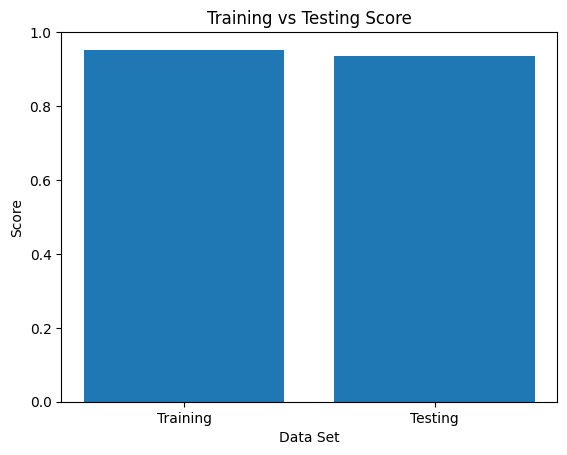

In [158]:

import matplotlib.pyplot as plt

# Prepare data
x = ['Training', 'Testing']
y = [lasso_regressor.score(X_train, y_train), lasso_regressor.score(X_test, y_test)]

# Plot the graph
plt.bar(x, y)
plt.xlabel("Data Set")
plt.ylabel("Score")
plt.title("Training vs Testing Score")
plt.show()


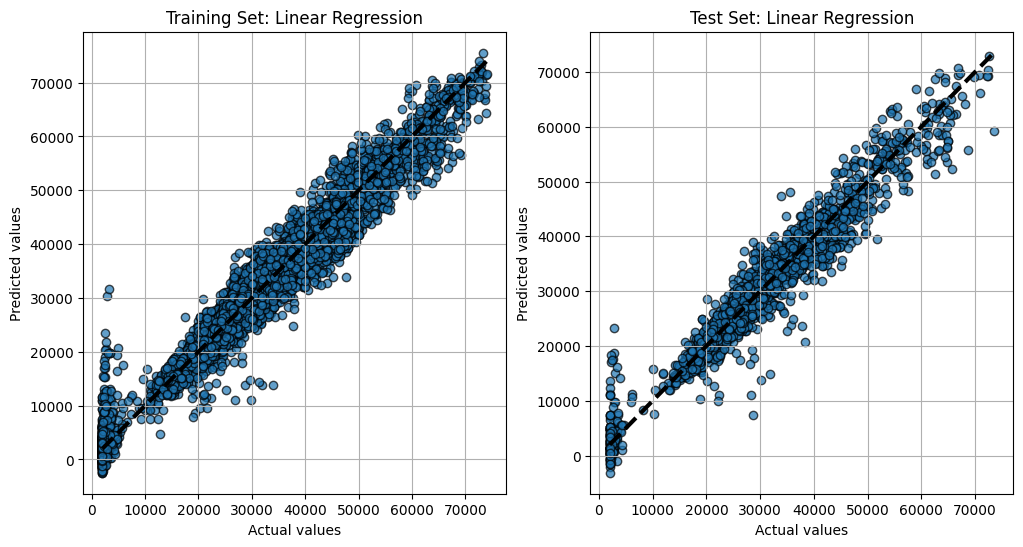

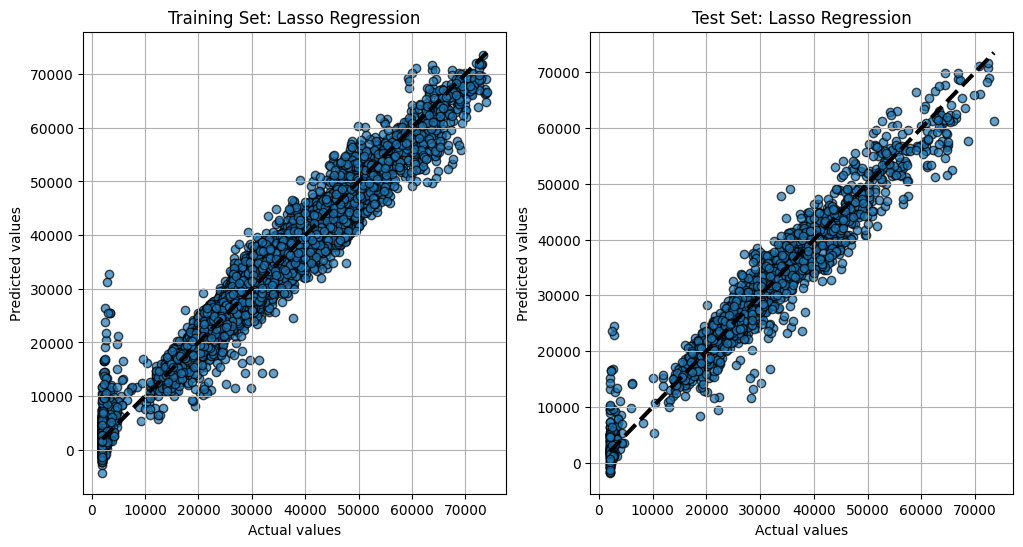

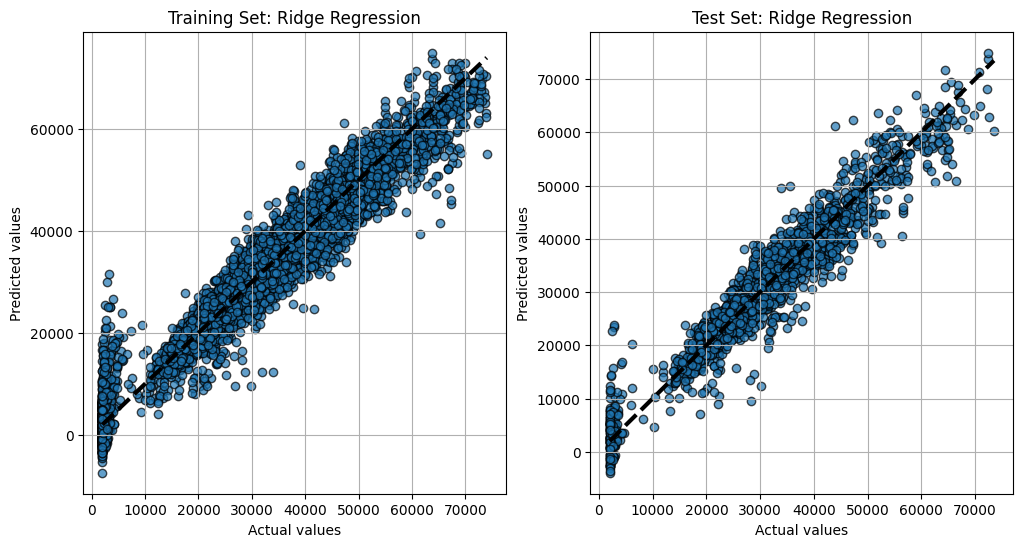

In [159]:


def plot_predictions(y_train, y_train_pred, y_test, y_test_pred, title):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, edgecolor='k', alpha=0.7)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
    plt.title(f'Training Set: {title}')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.grid(True)

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    plt.title(f'Test Set: {title}')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.grid(True)

    plt.show()

# Linear Regression Predictions
y_train_pred_lr = regressor.predict(X_train)
y_test_pred_lr = regressor.predict(X_test)
plot_predictions(y_train, y_train_pred_lr, y_test, y_test_pred_lr, 'Linear Regression')

# Lasso Predictions
y_train_pred_lasso = lasso_regressor.predict(X_train)
plot_predictions(y_train, y_train_pred_lasso, y_test, y_pred_lasso, 'Lasso Regression')

# Ridge Predictions
y_train_pred_ridge = ridge_regressor.predict(X_train)
plot_predictions(y_train, y_train_pred_ridge, y_test, y_pred_ridge, 'Ridge Regression')
